LAB #01



THIS IS MY FIRST LAB EXERCISE.

In [ ]:
# Some useful libraries
import numpy as np
from numpy.random import default_rng

#Pandas for data structure and analysis tools
import pandas as pd

#seaborn and matplotlib for plotting
import seaborn as sns
import matplotlib.pyplot as plt

#SciKit learn import
import sklearn

#for nice vector graphics
%matplotlib inline

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

np.random.seed(42) # Fixed seed for reproducibility, do not change this value
rng = default_rng()

<ipython-input-3-d3d7d7d861d1>:19: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('png', 'pdf')


# Problem 1

**Part 1.** Generate 1,000 samples of 2 dimensional data from the Gaussian distribution $\left(\begin{array}{cc}X_{i}\\Y_{i}\end{array}\right)∼N\biggl(\left(\begin{array}{cc}-5\\5\end{array}\right),\left(\begin{array}{cc}2 & 0.8\\0.8 & 3\end{array}\right)\biggr)$.

**Part 2.** Plot these points.

**Part 3.** Find the Eigenvectors and Eigenvalues of the covariance matrix using np.linalg.eig, or np.linalg.eigh, or something else of your choice.

**Part 4.** Now take the 1,000 points you generated in the first part, and use them to estimate the mean and covariance matrix for this multi-dimensional data using elementary numpy commands, i.e., addition, multiplication, division (do not use a command that takes data and returns the mean or standard deviation).

*Remark*: If you did this correctly: You should have made a number of observations. (i) The points you plotted should look like an elongated ellipse. (ii) The axis of elongation (the major axis of the ellipse) should be aligned with the eigenvector you computed that has the largest eigenvalue. The minor axis, should be aligned with the other eigenvector you computed. (iii) In the last part, you computed what is called the *empirical covariance* matrix. This should be quite close to the covariance matrix you used to generate the data. If we used more and more points (10,000, 100,000, etc.), then our empirical estimate would look more and more like what we used to generate the data.


In [ ]:
#Part 1
# Number of points
n = 1000

# Mean vector (mu)
mean = np.array([-5, 5])

# Covariance matrix (Sigma)
cov = np.array([[2, 0.8], [0.8, 3]])

# Generate 2D Gaussian samples
np.random.seed(42)
data = np.random.multivariate_normal(mean, cov, n)

# Separate the data into X and Y
X, Y = data[:, 0], data[:, 1]


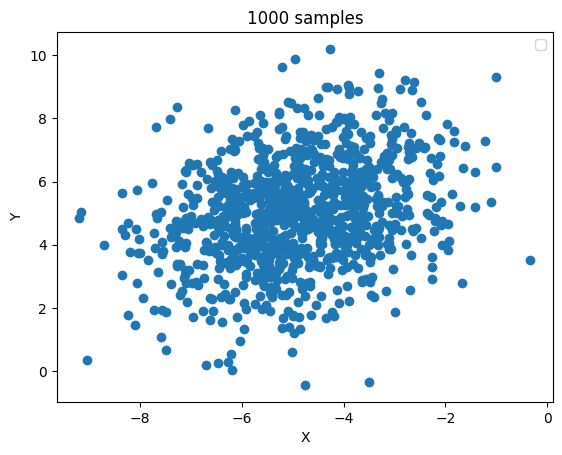

In [ ]:
#part 2
# Plot the generated data points
plt.scatter(X, Y)
plt.title('1000 samples')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


In [ ]:
# Part 3
np.linalg.eig(cov)


EigResult(eigenvalues=array([1.55660189, 3.44339811]), eigenvectors=array([[-0.87464248, -0.48476853],
       [ 0.48476853, -0.87464248]]))

In [ ]:
# part 4

mean_X = np.sum(X) / n
mean_Y = np.sum(Y) / n

mean_vector = np.array([mean_X, mean_Y])

# covariance matrix

cov_XX = np.sum((X - mean_X) * (X - mean_X)) / (n-1)
cov_XY = np.sum((X - mean_X) * (Y - mean_Y)) / (n-1)
cov_YX = cov_XY
cov_YY = np.sum((Y - mean_Y) * (Y - mean_Y)) / (n-1)

cov_matrix = np.array([[cov_XX, cov_XY], [cov_YX, cov_YY]])

print("Estimated mean vector")
print(mean_vector)

print("Estimated covariance matrix")
print(cov_matrix)


Estimated mean vector
[-4.90796615  5.01939811]
Estimated covariance matrix
[[1.97989687 0.67323524]
 [0.67323524 2.80766946]]


*Remark*: If you did this correctly: You should have made a number of observations. (i) The points you plotted should look like an elongated ellipse. (ii) The axis of elongation (the major axis of the ellipse) should be aligned with the eigenvector you computed that has the largest eigenvalue. The minor axis, should be aligned with the other eigenvector you computed. (iii) In the last part, you computed what is called the *empirical covariance* matrix. This should be quite close to the covariance matrix you used to generate the data. If we used more and more points (10,000, 100,000, etc.), then our empirical estimate would look more and more like what we used to generate the data.


# Problem 2: Central Limit Theorem

Back in EE351K you learned the Law of Large Numbers, and the Central Limit Theorem, among many other things. The Law of Large Numbers says that if $X_i$ are independent and identically distributed (iid) random variables, then $(1/N) \sum X_i$ converges to $\mathbb{E}[X]$. That's the law of large numbers.

You also learned the Central Limit Theorem. This says that if $X_i$ are zero mean, have variance 1, and are iid, then $(1/\sqrt{N}) \sum X_i$ converges to a random variable. Which random variable? A standard (zero mean, unit variance) Gaussian.

We're going to check the central limit theorem empirically, as an excuse to do more practice with Python and numpy and basic plotting.

Let $X_i$ be an iid Bernoulli random variable with value \{-1,1\}. Look at the random variable
$Z_n = \frac{1}{\sqrt{n}}\sum X_i$. By taking 1000 samples from $Z_n$, plot its histogram. {\bf Note:} To generate 1,000 samples from $Z_n$, you need to generate $1,000 \times n$ samples of $X_i$, since each $Z$ needs $1,000$ $X_i$'s. Now check that for small $n$ (set $n= 5$) $Z_n$ does not look that much like a Gaussian, but when $n$ is bigger (set $n = 50$) it looks much more like a Gaussian. Check also for much bigger $n$: $n = 250$, to see that at this point, one can really see the bell curve.

In [ ]:
samples = 1000
n = 5

X__i_samples = np.random.choice([-1,1],size=(samples, n))

Z_n_5samples = (1 / np.sqrt(n5)) * np.sum(X_i_samples, axis=1)

# Plot histogram of the 1000 samples of Z_n
plt.figure(figsize=(6, 5))
plt.hist(Z_n_5samples, bins=30, density=True, alpha=0.6, color='blue', edgecolor='black')
plt.title('Histogram of $Z_n$ for n = 5')
plt.xlabel('$Z_n$')
plt.ylabel('Density')
plt.grid(True)
plt.show()


NameError: name 'n5' is not defined

In [ ]:
samples = 1000
n = 50

X__i_samples = np.random.choice([-1,1],size=(samples, n))

Z_n_50samples = (1 / np.sqrt(n)) * np.sum(X__i_samples, axis=1)

# Plot histogram of the 1000 samples of Z_n
plt.figure(figsize=(6, 5))
plt.hist(Z_n_50samples, bins=30, density=True, alpha=0.6, color='blue', edgecolor='black')
plt.title('Histogram of $Z_n$ for n = 50')
plt.xlabel('$Z_n$')
plt.ylabel('Density')
plt.grid(True)
plt.show()

In [ ]:
samples = 1000
n = 250

X__i_samples = np.random.choice([-1,1],size=(samples, n))

Z_n_250samples = (1 / np.sqrt(n)) * np.sum(X__i_samples, axis=1)

# Plot histogram of the 1000 samples of Z_n
plt.figure(figsize=(6, 5))
plt.hist(Z_n_250samples, bins=30, density=True, alpha=0.6, color='blue', edgecolor='black')
plt.title('Histogram of $Z_n$ for n = 250')
plt.xlabel('$Z_n$')
plt.ylabel('Density')
plt.grid(True)
plt.show()

# Problem 3

Download from Canvas/Files the datasetPatientData.csv. Each row is a patient and the last column is the condition that the patient has.  Do data exploration using Pandas and other visualization tools to understand what you can about the data set. For example:

Part 1.  How many patients and how many features are there?

Part 2.  What is the meaning of the first 4 features?  See if you can understand what they mean.

Part 3.  Are there missing values?  Replace them with the average of the corresponding feature column and plot the feature histograms

Part 4.  How could you test which features strongly influence the patient condition and which do not? List what you think are the three most important features.

In [ ]:
# Part 1: Dataset load and initial check of data and shape:

dspd = pd.read_csv(r"C:\Users\aholm\OneDrive - Danmarks Tekniske Universitet\E2024\DATASCIENCEREPOSITORY\DATASCIENCE\data\external\PatientData.csv", header=None)

dspd.info

There are 452 patients with 280 corresponding features in the dataset.

In [ ]:
dspd.iloc[0:19, 0:4] # Selecting the first 20 rows (patients) and the first 4 columns (features) to check to look at a somple of the data

### Possible Interpretations of the Features

Here’s a breakdown of what the first four features could potentially represent:

- **Age**:
  - One of the most common features in any patient dataset is the age of the patient. This would usually be an integer value (like `56`, `54`, `55`, etc.), representing the age in years.

- **Gender**:
  - Another common feature is gender, often represented as `0` or `1` (binary coding). For example, `0` might represent "Male," and `1` might represent "Female." Sometimes, datasets also use `M` or `F` for male and female, respectively.

- **Blood Pressure**:
  - A critical health metric, often found in medical datasets, could be the systolic blood pressure (e.g., `165`, `172`, `175`). This value is typically measured in mmHg (millimeters of mercury).

- **Cholesterol Level**:
  - Another common feature in patient datasets is cholesterol level, which might be a number like `64`, `95`, `94`. It could represent total cholesterol or specific types like LDL (low-density lipoprotein) or HDL (high-density lipoprotein), measured in mg/dL (milligrams per deciliter).

In [ ]:
# Lets check for missing data in the set:

dspd.isnull().values.any()

In [ ]:
dspd.info()

It seems that there are entires across the entire dataframe as dspd.isnull().values.any() returns False. We can also see that some of the data is an object type. Lets check that.


In [ ]:
object_columns = dspd.select_dtypes(include=['object'])

print(object_columns)

It seems we found some missing entries marked as ?. Lets replace them with the average value in that column.

In [ ]:
object_columns = dspd.select_dtypes(include=['object'])

print(object_columns)

We identify 5 columns containing missing values. Now lets replace the values:

In [ ]:
# Convert columns to numeric changing object types to NaN

dspd = dspd.apply(pd.to_numeric, errors='coerce')

# Changing NaN to mean value:

dspd = dspd.apply(lambda x: x.fillna(x.mean()))

dspd.info()

We now see that there are no more object types meaning that we have replaced the ?-marks with the average values. Now lets see the distribution in a histogram:



In [ ]:
# list of columns to plot:
col_to_plot = [10, 11, 12, 13, 14]


fig, axes = plt.subplots(len(columns_to_plot), 1, figsize=(4, 10))

# Plot each histogram separately
for i, col in enumerate(columns_to_plot):
    sns.histplot(dspd[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Feature {col}')

plt.tight_layout()
plt.show()

It seems we were right in calculating the average in the case of feature 10, 11, 12 and 14. However it seems the value at row 13 distributes differently and averaging the value is not correct.

### Part 4.  How could you test which features strongly influence the patient condition and which do not? List what you think are the three most important features.

Since we have the dataset with a target condition we can approach the problem as X as all the numerical values that leads to a condition y. Therefore we are using a multi classification model to find out what features are the most important.

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the entire dataset and transform it
standardized_data_array = scaler.fit_transform(dspd)

# Convert the standardized array back to a DataFrame
standardized_data = pd.DataFrame(standardized_data_array, columns=dspd.columns)


In [ ]:
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = dspd.iloc[:, :-1]
y = dspd.iloc[:, -1]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Not great results, lets try training a decision tree:


In [ ]:
from sklearn import tree

In [ ]:
# Now let's train a decision tree
decision_tree = tree.DecisionTreeClassifier(max_depth=4)
decision_tree = decision_tree.fit(X_train, y_train)
tree.plot_tree(decision_tree)

In [ ]:
# Let's see how well we did. What's the accuracy on the training and test?
train_score = decision_tree.score(X_train,y_train)
test_score = decision_tree.score(X_test,y_test)

print("Train score: %.4f" % train_score)
print("Test score: %.4f" % test_score)


In [ ]:
training_scores = []
testing_scores = []
depth_values = range(15)
for depth in depth_values:
    dt = tree.DecisionTreeClassifier(max_depth=depth+1, criterion='gini')
    dt.fit(X_train,y_train)
    train_score = dt.score(X_train,y_train)
    test_score = dt.score(X_test, y_test)
    training_scores.append(train_score)
    testing_scores.append(test_score)

In [ ]:
print('These are the training scores:',training_scores)
print('These are the testing scores:',testing_scores)

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot(training_scores,label='training')
ax.plot(testing_scores,label='testing')
ax.set_xlabel('tree depth')  # Add an x-label to the axes.
ax.set_ylabel('accuracy')  # Add a y-label to the axes.
ax.set_title("Train vs Test")  # Add a title to the axes.
ax.legend();  # Add a legend.

In [ ]:
difference = []
zip_object = zip(training_scores, testing_scores)
for list1_i, list2_i in zip_object:
    difference.append(list1_i-list2_i)
fig2, ax2 = plt.subplots()  # Create a figure containing a single axes.
ax2.plot(difference,label='training')
ax.set_xlabel('tree depth')  # Add an x-label to the axes.
ax.set_ylabel('train - test')  # Add a y-label to the axes.
ax.set_title("Train minus Test")  # Add a title to the axes.
ax.legend();  # Add a legend.
plt.plot()

In [ ]:
importance = decision_tree.feature_importances_

# Create a DataFrame for feature importances
importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})

# Sort by importance
importance_df = importance.sort_values(by='Importance', ascending=False)

# Get the top 3 features
top_3_features = importance_df.head(3)

# Display the top 3 features
print("Top 3 Features with the Highest Importance Scores:")
print(top_3_features)


This must be the three most significant features.

# Problem 4
The goal of this exercise is for you to get more experience with Pandas, and to get a chance to explore a cool data set.  Download the fileNames.zip from Canvas.  This contains the frequency of all names that appeared more than 5 times on a social security application from 1880 through 2015.

Part 1. Write a program that on input $k$ and XXXX, returns the top $k$ names from year XXXX. Print out the top 100 names from the year 2000

Part 2. Write a program that on input Name returns the frequency for men and women of the name Name. Plot the frequency of the name "Alex" from the year 1880 to 2015

Part 3. It could be that names are more diverse now than they were in 1880, so that a name may be relatively the most popular, though its frequency may have been decreasing over the years.  Modify the above to return the relative frequency. Plot the relative frequency of the name "Alex" from the year 1880 to 2015

Part 4. Find all the names that used to be more popular for one gender, but then became more popular for another gender and print out the first 100 names (alphabetized).

•(Optional) Find something cool about this data set.

In [ ]:
import os

# read in file names
path = "C:/Users/peyto/Downloads/Names (1)/Names"
names = []

for filename in os.listdir(path):
  file_path = os.path.join(path, filename)

  with open(file_path, 'r') as file:
    cur = file.read()
    names.append(cur)

df = pd.DataFrame(names)
df.head()


FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/peyto/Downloads/Names (1)/Names'

# Problem 5

We looked at the MNIST data set in class. Recall that MNIST is a data set of handwritten digits. It is considered one of the ``easiest'' image recognition problems in computer vision. You can find the MNIST data set which we will use, here: https://www.openml.org/d/554. Though we haven't introduced decision trees formally, we have had a chance to see them in action in class. This exercise is an opportunity to play around with this data set, and in advance of when we get to talk about decision trees in detail, have a chance to see how they work. In short, this is an exercise in learning-by-doing.


Part 1. (Nothing to submit) Make sure you can run through the entire Colab notebook posted. Especially if you haven't used Python, try to understand what every line is doing.

Part 2. How many data points are there, how many features are there, and what do the features represent?

Part 3. Compute how many times each digit appears in the dataset.

Part 4. Read the documentation for sklearn.model_selection.train_test_split and explain what this does.

Part 5. Read the documentation for DecisionTreeClassifier, and explain what score means.

Part 6. What happens to the **training score** as you increase the depth of the tree? Explain.

Part 7. What happens to the difference between **training score** and **testing score** as you increase the depth of the tree? Explain.

Part 8. Fix the depth of the three, say, depth=7. Then plot the difference of training score - testing score when you train on: 100, 500, 5000, 10000, 15,0000, 20,000, 25,000 points, always computing testing score by evaluating on the complement of the training set. Plot this trend.  Try to explain what you are seeing.  

###Part 2:

In [ ]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml(data_id=554, as_frame=True)
data = mnist.data
labels = mnist.target
mnist = pd.concat([data, labels], axis=1)
mnist.rename(columns={mnist.columns[-1]: 'label'}, inplace=True)
print(mnist.head())
rows, cols = mnist.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {cols}")


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   pixel10  ...  pixel776  pixel777  pixel778  pixel779  pixel780  pixel781  \
0      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
1      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
2      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
3      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
4      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   

   pixel782  pixel783  pixel784  label  
0       0.0       0.0

*   Based on the shape of the mnist DataFrame, we can infer that there are 70000 data points which represent a unique handwritten digit from 0 to 9.
*   There are 784 different features in this dataframe which each correspond to the pixel value within a 28px28p image. The pixel values/features correspond to a given pixel's grayscale intensity

### Part 3:


In [ ]:
#print(mnist.columns)
label_counts = labels.value_counts()
print(label_counts)

class
1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: count, dtype: int64


### Part 4:
The ``` train_test_split``` feature allows you to partition your data into subsets for training and testing respectfully. This means that you can properly evaluate the performance of the model with on the testing data, giving a more accurate estimate on how the model will perform on new data.



### Part 5:
The ``` DecisionTreeClassifier ``` is an object which may be created to train a model implemented for classification problems. The model will construct a decision tree with optimized decision criteria and make appropriate classifications when provided new data for prediction. The score metric provides the accuracy of the model - i.e. the proportion of correctly predicted labels to the total number of labels.

### Part 6:
When you increase the height of the decision tree, the training error will decrease consistently. This is because the model becomes more specifically designed to make decisions based on the provided training data.

### Part 7:
When you increase the depth of the decision tree, the magnitude of the difference between the training and testing error will grow larger. This is because the model will begin to overfit to the training data. The test error will increase as the model makes assumptions about the data that may only be reflected by the training data set.

### Part 8:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import tree

training_sizes = [100, 500, 5000, 10000, 15000, 20000, 25000]
training_scores = []
testing_scores = []
differences = []
n=70000

for size in training_sizes:
  X_train, X_test, Y_train, Y_test = train_test_split(data, labels, train_size=size, test_size=n-size)
  dt = tree.DecisionTreeClassifier(max_depth=7)
  dt.fit(X_train,Y_train)
  train_score = dt.score(X_train,Y_train)
  test_score = dt.score(X_test, Y_test)
  differences.append(train_score-test_score)
  training_scores.append(train_score)
  testing_scores.append(test_score)

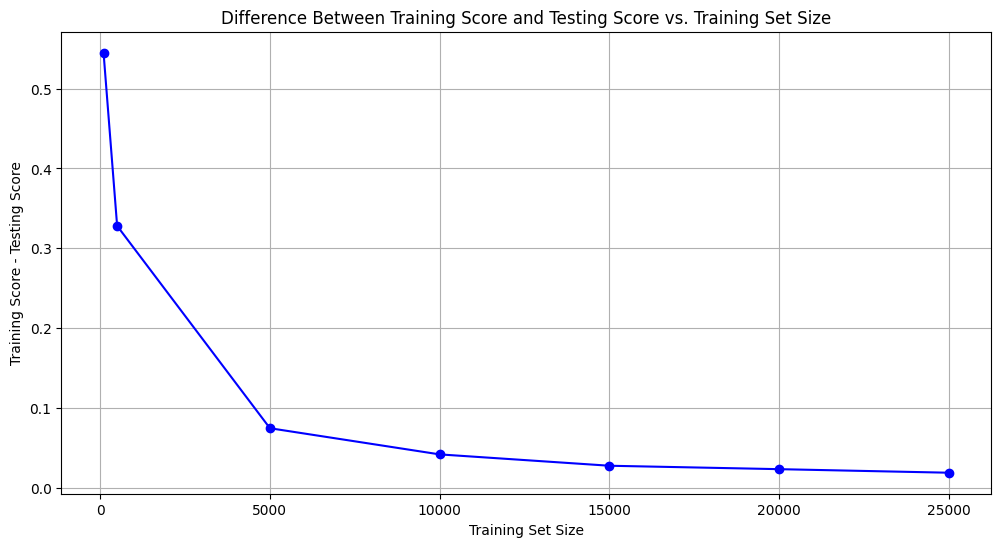

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(training_sizes, differences, marker='o', linestyle='-', color='b')
plt.xlabel('Training Set Size')
plt.ylabel('Training Score - Testing Score')
plt.title('Difference Between Training Score and Testing Score vs. Training Set Size')
plt.grid(True)
plt.show()

What is shown above is the performance of the model is increasing as the training data set size becomes larger.

# Problem 6

We now turn to a somewhat more sophisticated data set: CIFAR10.
Here is an initial colab notebook: https://colab.research.google.com/drive/1H3a4yVuZLatBvFjrUp5aFBJn_vfmXj7o?usp=sharing

Part 1. How many data points are there, and how many labels? How many points for each label?

Part 2. There are two ``TO DOs'' listed in the colab notebook. Complete these.


If you did this correctly and ran the notebook, you noticed that CIFAR10 indeed looks like a ``harder'' problem. Deep trees are again doing very well on the training set, and they do a little better than guessing on the testing data, but not as well as they do on MNIST. We will revisit CIFAR10 several times, as we develop more powerful tools. And we will see that we will do much better than deep decision trees!